<a href="https://colab.research.google.com/github/ane-schow/oceanografia/blob/main/serie_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

bibliotecas

# Serie temporal

In [ ]:
!pip install netCDF4
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.4 MB/s eta 0:00:00


caminho e variaveis que vamos utilizar

In [ ]:
vel = xr.open_dataset('velocidade em 2 anos.nc')
vo = vel['vo']
uo = vel['uo']
tempo = vel['time']

fazer a média da área e profundidade da velocidade

In [ ]:
vo_3d = vo.isel(time=slice(0,20), depth=slice(0,18), latitude=slice(0, 244), longitude=slice(0,286)).mean(dim='depth')
vo_2d = vo_3d.isel(time=slice(0,20), latitude=slice(0, 244), longitude=slice(0,286)).mean(dim='latitude')
vo_1d = vo_2d.isel(time=slice(0,20),  longitude=slice(0,286)).mean(dim='longitude')

uo_3d = uo.isel(time=slice(0,20), depth=slice(0,18), latitude=slice(0, 244), longitude=slice(0,286)).mean(dim='depth')
uo_2d = uo_3d.isel(time=slice(0,20), latitude=slice(0, 244), longitude=slice(0,286)).mean(dim='latitude')
uo_1d = uo_2d.isel(time=slice(0,20),  longitude=slice(0,286)).mean(dim='longitude')

fazer o comprimento o vetor da velocidade

In [ ]:
vel_media = (vo_1d**2 + uo_1d**2)**1/2


fazer serie temporal e plotar

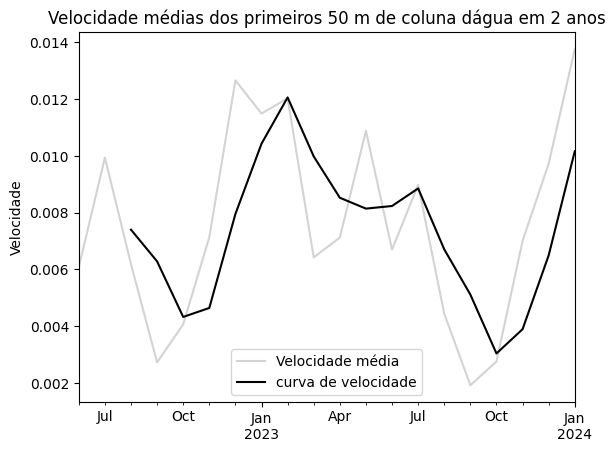

In [ ]:
dm_temporal = pd.DataFrame({'vel_media': vel_media}, index=pd.to_datetime(tempo))
dm_temporal['smoothed'] = dm_temporal['vel_media'].rolling(window=3).mean()
ax = dm_temporal['vel_media'].plot(color='lightgray', label='Velocidade média')
dm_temporal['smoothed'].plot(ax=ax, color='k', label='curva de velocidade')
plt.ylabel('Velocidade')
plt.title('Velocidade médias dos primeiros 50 m de coluna dágua em 2 anos')
plt.legend()
plt.show()

smoothed data